# Overview of pipeline

<img src="https://github.com/yjwong1999/EY-challenge-2024/blob/main/Team%20Double%20Y%20-%20Methodology.jpg?raw=true" alt="Methodology">


# 0. Prerequisites

## Code Structure

You can also refer to our [GitHub Repo](https://github.com/yjwong1999/EY-challenge-2024)

#### Before unzip
Make sure you put the `additional-dataset.zip` and `labelled-dataset.zip` as shown below:
```
Double-Y
├── our-best-runs                       (proof of our experiment that yields the highest mAP)
│   ├── detect
│   │   ├── predict                     
│   │   ├── train                       
├── additional-dataset.zip              (additional dataset)
├── best-trained-model.pt               (best trained model which we used for submission, mAP 0.51)
├── challenge_1_submission_images.zip   (just the zip file of EY Challenge Phase 1 test images)
├── labelled-dataset.zip                (labelled dataset)
├── Model-development-notebook.ipynb    (to train the model)
├── pretrained-on-msft-puerto-rico      (models pretrained on Microsoft Building Footprint -> Puerto Rico dataset)
├── requirements.txt                    (dependencies requirement)
├── Validation-notebook.ipynb           (for Phase 1 submission)
```

### We are not able to upload our additional dataset due to filesize limit. Hence, please refer the other notebook for training:</br></br>-> Model-development-notebook (backup).ipynb

In [1]:
import os
import zipfile

def unzip_folder(zip_filepath, dest_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)
    print(f'The zip file {zip_filepath} has been extracted to the directory {dest_dir}')

# create dataset directory
if not os.path.isdir('dataset'):
    os.makedirs('dataset')

# Unzip additional dataset
zip_file = './additional-dataset.zip'
unzip_directory = './dataset/additional-dataset'
if not os.path.isdir(unzip_directory):
    unzip_folder(zip_file,unzip_directory)

# Unzip labelled dataset
zip_file = './labelled-dataset.zip'
unzip_directory = './dataset/labelled-dataset'
if not os.path.isdir(unzip_directory):
    unzip_folder(zip_file,unzip_directory)

The zip file ./additional-dataset.zip has been extracted to the directory ./dataset/additional-dataset
The zip file ./labelled-dataset.zip has been extracted to the directory ./dataset/labelled-dataset


#### After unzip
```
Double-Y
├── dataset                             (to store all datasets)
│   ├── additional-dataset              (to store additional datasets)
│   │   ├── msft-puerto-rico
│   ├── labelled-dataset                (to store all laballed challange datasets)
│   │   ├── crowd-sourced
│   │   ├── self-annotated
│   │   ├── experts
├── our-best-runs                       (proof of our experiment that yields the highest mAP)
│   ├── detect
│   │   ├── predict                     
│   │   ├── train
├── additional-dataset.zip              (additional dataset)
├── best-trained-model.pt               (best trained model which we used for submission, mAP 0.51)
├── challenge_1_submission_images.zip   (just the zip file of EY Challenge Phase 1 test images)
├── labelled-dataset.zip                (labelled dataset)
├── Model-development-notebook.ipynb    (to train the model)
├── pretrained-on-msft-puerto-rico      (models pretrained on Microsoft Building Footprint -> Puerto Rico dataset)
├── requirements.txt                    (dependencies requirement)
├── Validation-notebook.ipynb           (for Phase 1 submission)
```

### Install dependencies

In [2]:
# install dependencies
# !pip install -r requirements.txt # NOT RECOMMENDED if deployed in PLANETARY HUB (or other VM)

# install pytorch (please do not reinstall, if the VM instance already have pytorch installed
# pip3 install torch==2.0.0 torchvision==0.15.1 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu118

# install ultralytics + opencv
%pip install ultralytics==8.0.196
!pip install opencv-python-headless==4.9.0.80

# MODULE 1: Pretraining

In this module, we will use [Microsoft Building Footprints (BF)](https://planetarycomputer.microsoft.com/dataset/ms-buildings#overview) dataset to train a YOLOv8n model. This model will serve as pretrained model, which will be fine-tuned for EY Challenge 2024 dataset in Module 2. 


### Assumptions:
1. We assume all buildings in Microsoft BF dataset are undamaged residential buildings (since majority buildings are residential). The exact class is not important, since the dataset is only for pretraining.

### Module 1 Pipeline:
1. Get **Microsoft-Building** dataset (only Puerto Rico region) 
2. **Transfer Learning**: Use YOLOv8 (with COCO weights) on the Puerto Rico dataset

Note that there are **no manual annotation required** from the user side! We just have to extract from the Microsoft BF dataset

In [3]:
from ultralytics import YOLO

# yaml file of the Puerto Rico dataset
yaml_file = "dataset/additional-dataset/msft-puerto-rico/data.yaml"

# use COCO pretrained YOLOv8 models for transfer learning
model = YOLO("yolov8n.pt")
model.train(data=yaml_file, epochs=80, imgsz=512, plots=True)

100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 54.0MB/s]
New https://pypi.org/project/ultralytics/8.1.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.8.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 7974MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset/additional-dataset/msft-puerto-rico/data.yaml, epochs=80, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=F

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe4a1e98f40>
fitness: 0.3794640517129215
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.34873])
names: {0: 'buildings'}
plot: True
results_dict: {'metrics/precision(B)': 0.7300005628785157, 'metrics/recall(B)': 0.611353279175748, 'metrics/mAP50(B)': 0.6560390101806547, 'metrics/mAP50-95(B)': 0.3487335007720623, 'fitness': 0.3794640517129215}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.10780662353289987, 'inference': 0.9868631227767108, 'loss': 0.00045847466751446493, 'postprocess': 0.7253172070026692}

In [4]:
# Validation

!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={yaml_file}

Ultralytics YOLOv8.0.196 🚀 Python-3.8.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 7974MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/tham/Desktop/delete/EY/dataset/additional-dataset/msft-puert
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1623      10094      0.731      0.611      0.656      0.348
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [5]:
# rename "runs" directory to "pretrained"
import os
os.rename('runs', 'pretrained')

# MODULE 2: Fine-tune + MLOps

In this module, we will use the pretrained model from  Module 1, and fine-tune it using EY Challenge 2024 dataset. 

### Assumptions:
1. **Our observation**: When labelling multiple versions of the provided post-disaster dataset, we observed that not all annotated data aligns with the expected outcomes in the EY validation images. Some of our annotated datasets yield high mAP, some yield low mAP.
2. Consequently, we assume **datasets that perform exceptionally well** as the **“expert dataset”,** annotated by **“expert annotators”.** Conversely, the **datasets that do not yield results** as good as the expert dataset are referred to as the **“crowd-sourced dataset”**.
3. We assume expert annotators could effectively differentiate damaged/undamaged commercial and residential buildings. Logically, the expert dataset is a **quality > quantity** dataset.
4. Meanwhile, crowd-sourced dataset is a **quantity > quality dataset**. We assume this is labelled by volunteer annotators in real life scenario, rather than the experts

### Module 2 Pipeline:
1. We initially **fine-tune the pretrained model (from Module 1)** using a "large-scale crowd-sourced dataset" to **quickly warm it up**.
2. In mid-way, we use some self-annotation technique to extract the **self-annotated dataset**. We fine-tune the model from Step 1 on the self-annotated dataset.
3. Lastly, we **fine-tune the model on the expert dataset**, which has more accurate labels.

Note that without transfer learning using Module 1's YOLOv8, there is a high chance of overfitting on the actual validation data provided by the EY Challenge 2024 dataset. You might get a better train mAP, but it does not actually reflect the mAP on the test set. You can refer our approach document in the content package for our ablation study.

### Fine-tune on crowd-sourced dataset

In [6]:
from ultralytics import YOLO
import os 

# yaml file of the training dataset
yaml_file = "dataset/labelled-dataset/crowd-sourced/data.yaml"

# use pretrained model (via Puerto Rioo dataset) + fine tune on crowd-sourced dataset
model = YOLO(f"{os.getcwd()}/pretrained/detect/train/weights/best.pt")
model.train(data=yaml_file, epochs=50, imgsz=512, plots=True)

New https://pypi.org/project/ultralytics/8.1.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.8.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 7974MiB)
engine/trainer: task=detect, mode=train, model=/home/tham/Desktop/delete/EY/pretrained/detect/train/weights/best.pt, data=dataset/labelled-dataset/crowd-sourced/data.yaml, epochs=50, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe537c02f40>
fitness: 0.3513725514503218
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.4892,      0.3992,     0.22253,     0.21205])
names: {0: '0', 1: '1', 2: '2', 3: '3'}
plot: True
results_dict: {'metrics/precision(B)': 0.5059302947682462, 'metrics/recall(B)': 0.5993382587132587, 'metrics/mAP50(B)': 0.5370082715449616, 'metrics/mAP50-95(B)': 0.3307463603286952, 'fitness': 0.3513725514503218}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.1164873441060384, 'inference': 1.0650356610616047, 'loss': 0.0014106432596842449, 'postprocess': 1.4220277468363445}

In [7]:
# rename
import os
os.rename('runs', 'fine-tune-on-crowd-sourced')

### Fine-tune on self-annotated dataset

In [8]:
from ultralytics import YOLO

# yaml file of the training dataset
yaml_file = "dataset/labelled-dataset/self-annotated/data.yaml"

# use COCO pretrained YOLOv8 models from Module 1 for transfer learning
model = YOLO(f"{os.getcwd()}/fine-tune-on-crowd-sourced/detect/train/weights/best.pt")
model.train(data=yaml_file, epochs=20, imgsz=512, plots=True)

New https://pypi.org/project/ultralytics/8.1.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.8.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 7974MiB)
engine/trainer: task=detect, mode=train, model=/home/tham/Desktop/delete/EY/fine-tune-on-crowd-sourced/detect/train/weights/best.pt, data=dataset/labelled-dataset/self-annotated/data.yaml, epochs=20, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe544c8acd0>
fitness: 0.6128324628945646
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.78656,     0.58534,     0.61169,      0.3993])
names: {0: '0', 1: '1', 2: '2', 3: '3'}
plot: True
results_dict: {'metrics/precision(B)': 0.7441781779373736, 'metrics/recall(B)': 0.6821180631608624, 'metrics/mAP50(B)': 0.7668095626270187, 'metrics/mAP50-95(B)': 0.5957238962576252, 'fitness': 0.6128324628945646}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.10569095611572266, 'inference': 1.2398099899291992, 'loss': 0.0005197525024414062, 'postprocess': 0.8734512329101562}

In [9]:
os.rename('runs', 'fine-tune-on-self-annotated')

### Fine-tune on expert dataset

In [10]:
from ultralytics import YOLO

# yaml file of the training dataset
yaml_file = "dataset/labelled-dataset/experts/data.yaml"

# use COCO pretrained YOLOv8 models from Module 1 for transfer learning
model = YOLO(f"{os.getcwd()}/fine-tune-on-self-annotated/detect/train/weights/best.pt")
model.train(data=yaml_file, epochs=10, imgsz=512, plots=True)

New https://pypi.org/project/ultralytics/8.1.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.8.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 7974MiB)
engine/trainer: task=detect, mode=train, model=/home/tham/Desktop/delete/EY/fine-tune-on-self-annotated/detect/train/weights/best.pt, data=dataset/labelled-dataset/experts/data.yaml, epochs=10, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe3da584400>
fitness: 0.2545307959590762
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.42017,    0.066736,     0.20073,     0.28003])
names: {0: '0', 1: '1', 2: '2', 3: '3'}
plot: True
results_dict: {'metrics/precision(B)': 0.3983325603025667, 'metrics/recall(B)': 0.5742625745950554, 'metrics/mAP50(B)': 0.36807025404650384, 'metrics/mAP50-95(B)': 0.2419153006160287, 'fitness': 0.2545307959590762}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.13539791107177734, 'inference': 1.0439872741699219, 'loss': 0.0012159347534179688, 'postprocess': 1.0242938995361328}

## Results and Visualization

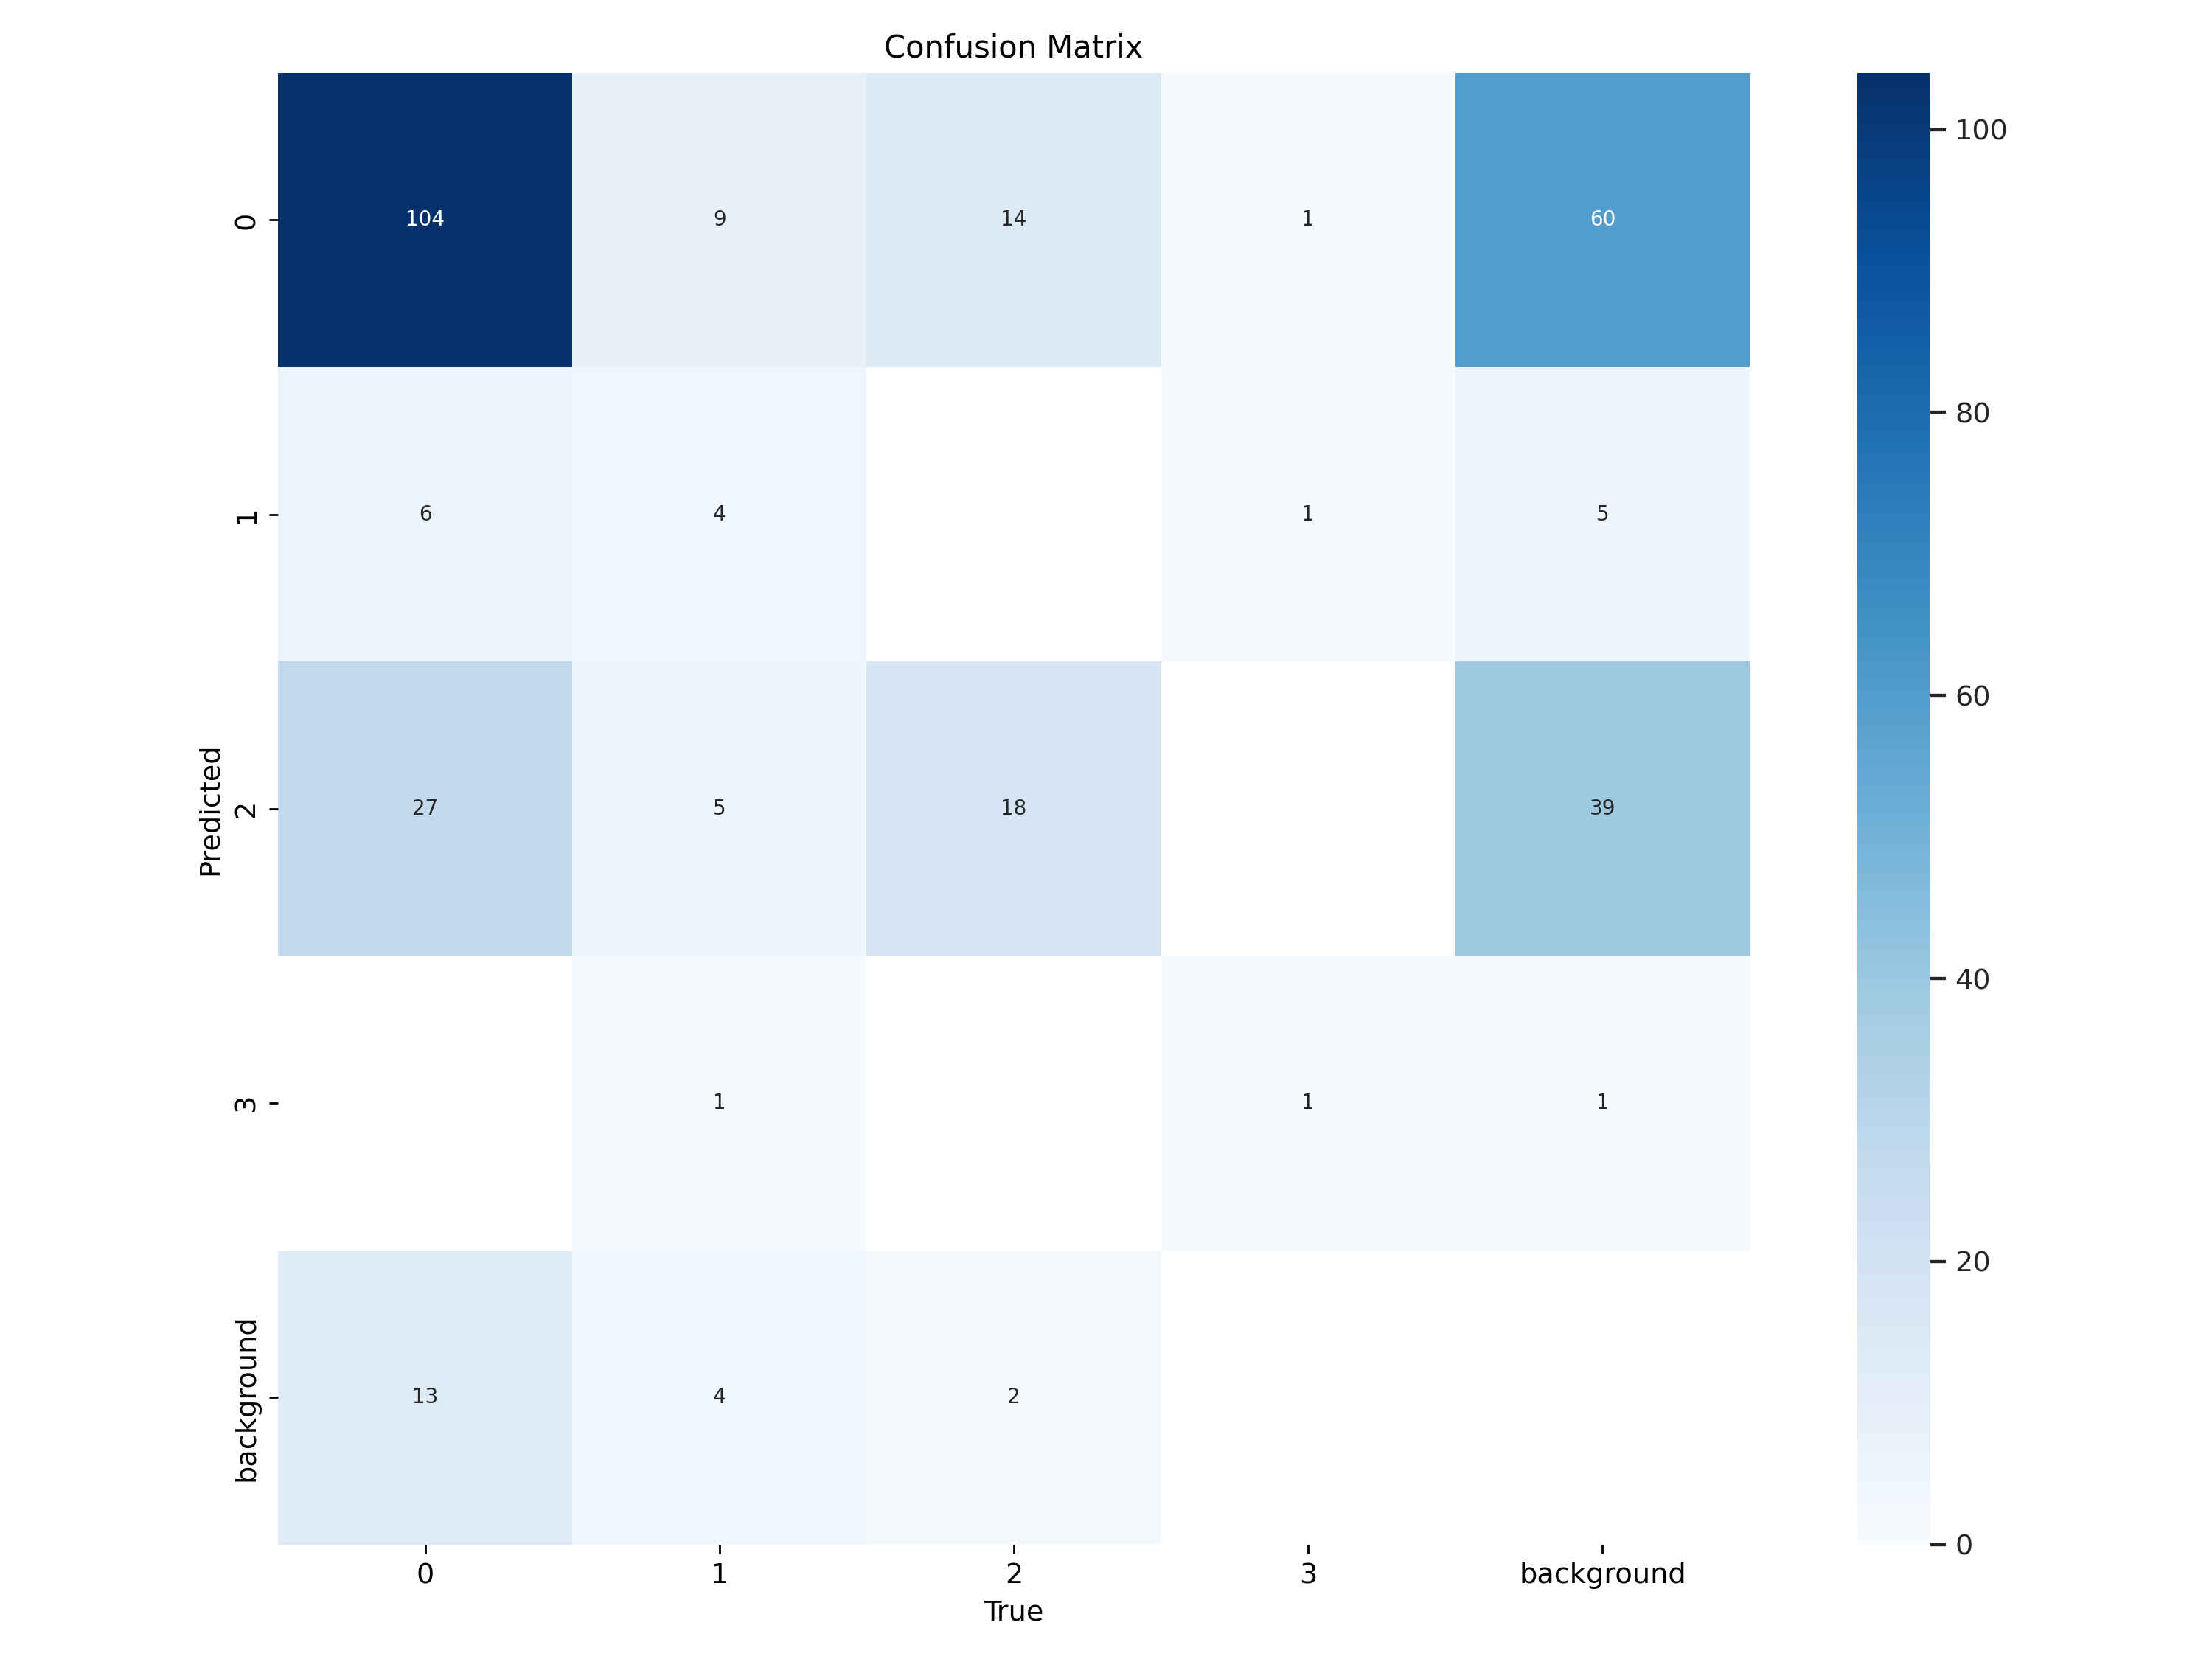

In [11]:
from IPython.display import Image

Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

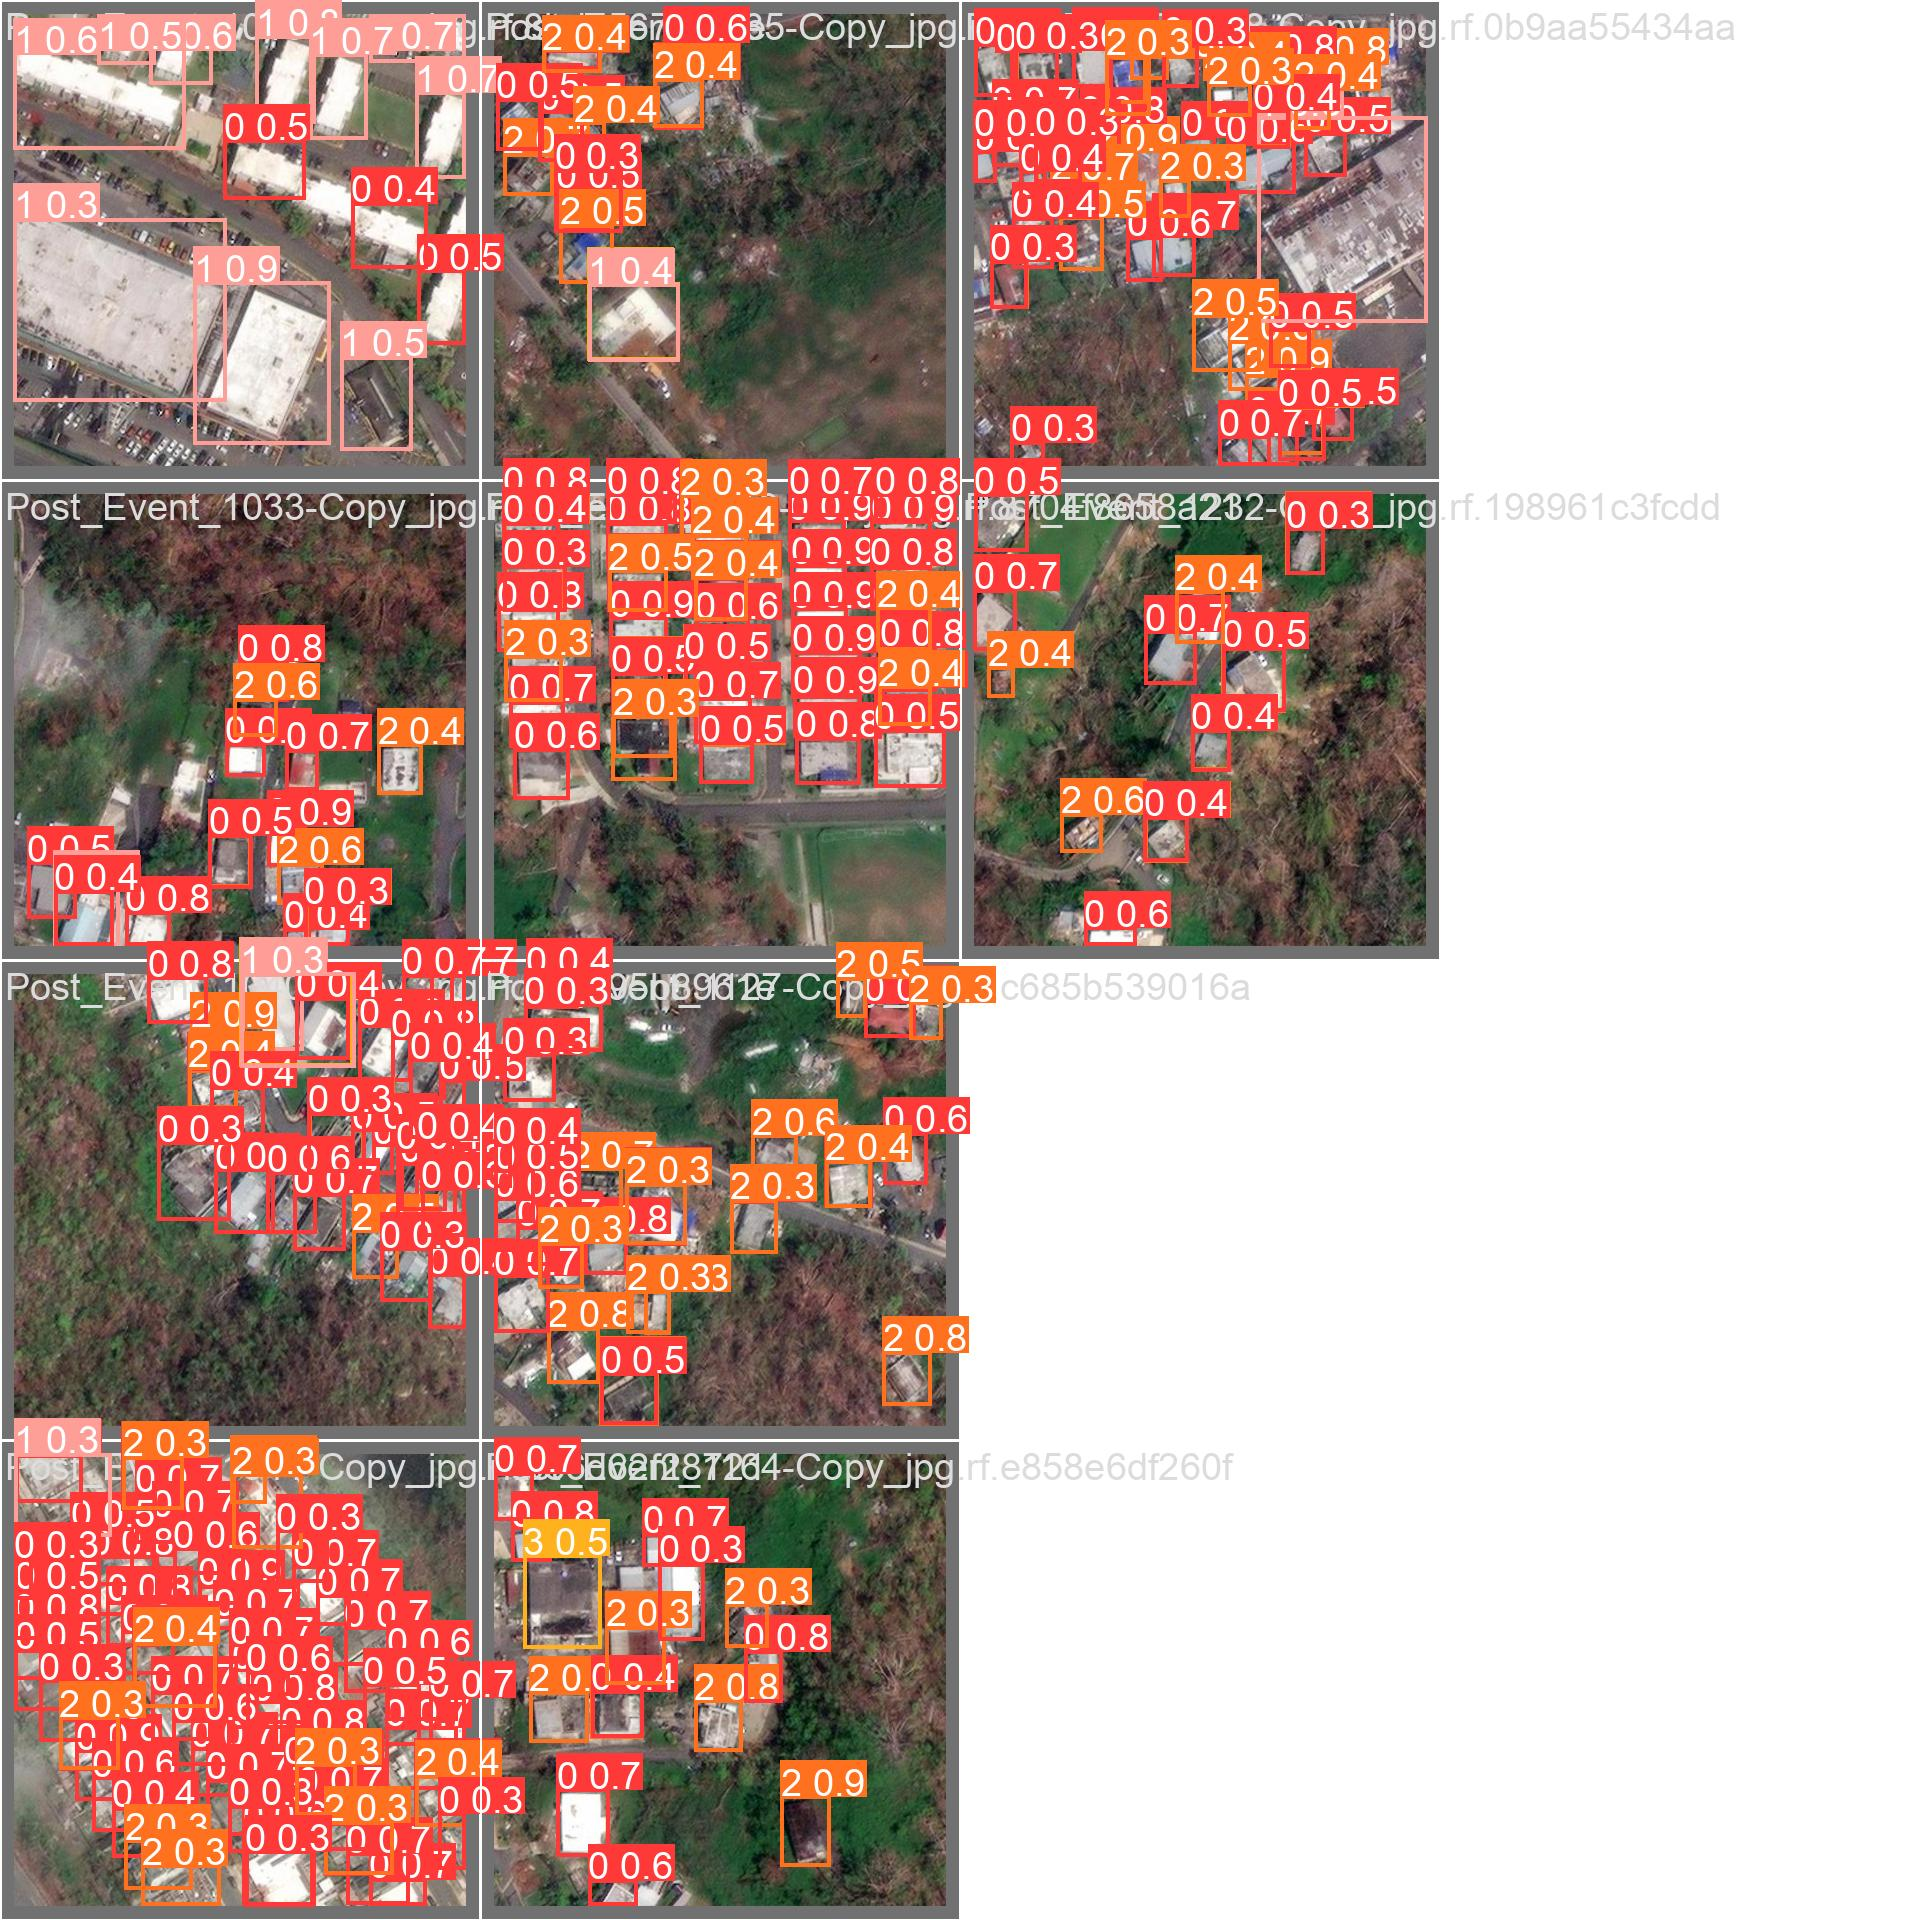

In [13]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)